## import the needed libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## read data 

In [2]:
data= pd.read_csv('ex1data1.txt',header=None ,names=['Population','Profit'])
data

,Population,Profit
0,6.1101,17.59200
1,5.5277,9.13020
2,8.5186,13.66200
3,7.0032,11.85400
4,5.8598,6.82330
...,...,...
92,5.8707,7.20290
93,5.3054,1.98690
94,8.2934,0.14454
95,13.3940,9.05510


## show data details

data= 
    Ones  Population   Profit
0     1      6.1101  17.5920
1     1      5.5277   9.1302
2     1      8.5186  13.6620
3     1      7.0032  11.8540
4     1      5.8598   6.8233
5     1      8.3829  11.8860
6     1      7.4764   4.3483
7     1      8.5781  12.0000
8     1      6.4862   6.5987
9     1      5.0546   3.8166
***********************************
data description 
        Ones  Population     Profit
count  97.0   97.000000  97.000000
mean    1.0    8.159800   5.839135
std     0.0    3.869884   5.510262
min     1.0    5.026900  -2.680700
25%     1.0    5.707700   1.986900
50%     1.0    6.589400   4.562300
75%     1.0    8.578100   7.046700
max     1.0   22.203000  24.147000
***********************************


<AxesSubplot: xlabel='Population', ylabel='Profit'>

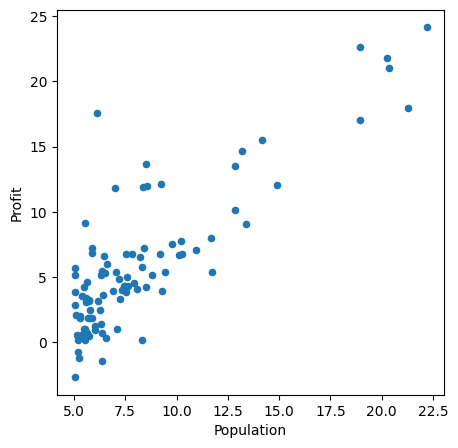

In [20]:
print('data= \n' , data.head(10))
print('***********************************')
print('data description \n',data.describe())
print('***********************************')
data.plot(kind='scatter',x='Population',y='Profit',figsize=(5,5))

## adding a new column called ones before the data to be the X0

In [5]:
data.insert(0,'Ones',1)

## show data after modification

In [21]:
print('new data = \n',data.head(10))

new data = 
    Ones  Population   Profit
0     1      6.1101  17.5920
1     1      5.5277   9.1302
2     1      8.5186  13.6620
3     1      7.0032  11.8540
4     1      5.8598   6.8233
5     1      8.3829  11.8860
6     1      7.4764   4.3483
7     1      8.5781  12.0000
8     1      6.4862   6.5987
9     1      5.0546   3.8166


## separate X (training data) from y (target variable)

In [25]:
cols=data.shape[1]
X=data.iloc[:,0:cols-1]
y=data.iloc[:,cols-1:cols]


In [30]:
print('X data = \n',X.head(10))
print('***********************************')
print('y data = \n',y.head(10))

X data = 
    Ones  Population
0     1      6.1101
1     1      5.5277
2     1      8.5186
3     1      7.0032
4     1      5.8598
5     1      8.3829
6     1      7.4764
7     1      8.5781
8     1      6.4862
9     1      5.0546
***********************************
y data = 
     Profit
0  17.5920
1   9.1302
2  13.6620
3  11.8540
4   6.8233
5  11.8860
6   4.3483
7  12.0000
8   6.5987
9   3.8166


## convert from data frames to numpy matrices

In [32]:
X=np.matrix(X.values)
y=np.matrix(y.values)
theta=np.matrix(np.array([0,0]))

In [33]:
print('X = \n',X)
print('***********************************')
print('X shape = \n',X.shape)
print('***********************************')
print('y = \n',y)
print('***********************************')
print('y = \n',y.shape)
print('***********************************')
print('theta = \n',theta)
print('***********************************')
print('theta shape = \n',theta.shape)

X = 
 [[ 1.      6.1101]
 [ 1.      5.5277]
 [ 1.      8.5186]
 [ 1.      7.0032]
 [ 1.      5.8598]
 [ 1.      8.3829]
 [ 1.      7.4764]
 [ 1.      8.5781]
 [ 1.      6.4862]
 [ 1.      5.0546]
 [ 1.      5.7107]
 [ 1.     14.164 ]
 [ 1.      5.734 ]
 [ 1.      8.4084]
 [ 1.      5.6407]
 [ 1.      5.3794]
 [ 1.      6.3654]
 [ 1.      5.1301]
 [ 1.      6.4296]
 [ 1.      7.0708]
 [ 1.      6.1891]
 [ 1.     20.27  ]
 [ 1.      5.4901]
 [ 1.      6.3261]
 [ 1.      5.5649]
 [ 1.     18.945 ]
 [ 1.     12.828 ]
 [ 1.     10.957 ]
 [ 1.     13.176 ]
 [ 1.     22.203 ]
 [ 1.      5.2524]
 [ 1.      6.5894]
 [ 1.      9.2482]
 [ 1.      5.8918]
 [ 1.      8.2111]
 [ 1.      7.9334]
 [ 1.      8.0959]
 [ 1.      5.6063]
 [ 1.     12.836 ]
 [ 1.      6.3534]
 [ 1.      5.4069]
 [ 1.      6.8825]
 [ 1.     11.708 ]
 [ 1.      5.7737]
 [ 1.      7.8247]
 [ 1.      7.0931]
 [ 1.      5.0702]
 [ 1.      5.8014]
 [ 1.     11.7   ]
 [ 1.      5.5416]
 [ 1.      7.5402]
 [ 1.      5.3077]
 [ 1. 

## cost function

In [47]:
def computeCost(X,y,theta):
    RSS=np.power(((X*theta.T)-y),2)
    #print("RSS = \n", RSS)
    #print('***********************************')
    #print("RSS shape = \n", RSS.shape)
    #print('***********************************')
    #print("n =\n" ,len(X))
    j=RSS.sum()/(2*len(X))
    return j
print("cost function output",computeCost(X,y,theta))

cost function output 32.072733877455676


## Gradient Descent

In [48]:
def Gradient_Descent(X,y,theta,alpha,iterations):
    tempTheta=np.matrix(np.zeros(theta.shape)) # [0,0]
    parametersNumber=int(theta.shape[1]) # parameters=2 as we have 2 columns theta0 and theta 1
    cost=np.zeros(iterations)
    #print('parametersNumber=\n', parametersNumber)
    #print('***********************************')
    #print('cost= \n',cost)
    for i in range(iterations):
        error=(X*theta.T)-y
        for j in range (parametersNumber):
            errorXxj= np.multiply(error,X[:,j])
            tempTheta[0,j]=theta[0,j]-(alpha/len(X))*(np.sum(errorXxj))
        theta= tempTheta
        cost[i]=computeCost(X,y,theta)
    return theta , cost
    

## initialize variables for learning rate and iterations

In [45]:
alpha=0.01
iterations =1000

## perform gradient descent to "fit" the model parameters

In [54]:
newtheta , cost = Gradient_Descent(X,y,theta,alpha,iterations)
print('newtheta=\n',newtheta)
print('************************************************************************')
print('cost=\n',cost[0:50])
print('************************************************************************')
print('compute cost =',computeCost(X,y,newtheta))

newtheta=
 [[-3.24140214  1.1272942 ]]
************************************************************************
cost=
 [6.73719046 5.93159357 5.90115471 5.89522859 5.89009494 5.88500416
 5.87993248 5.87487909 5.86984391 5.86482687 5.85982789 5.85484692
 5.84988389 5.84493874 5.8400114  5.83510181 5.8302099  5.82533562
 5.82047889 5.81563965 5.81081784 5.8060134  5.80122627 5.79645638
 5.79170367 5.78696808 5.78224955 5.77754801 5.77286341 5.76819568
 5.76354477 5.75891061 5.75429313 5.7496923  5.74510803 5.74054027
 5.73598897 5.73145406 5.72693549 5.72243319 5.71794711 5.71347718
 5.70902336 5.70458558 5.70016379 5.69575792 5.69136792 5.68699373
 5.6826353  5.67829257]
************************************************************************
compute cost = 4.515955503078914


## get best fit line`

In [56]:
x_axis=np.linspace(data.Population.min(),data.Population.max(),100)
print('x-axis values= \n',x_axis)
print('********************************************************************')
print('01 and 02= \n',newtheta)
print('********************************************************************')
f=newtheta[0,0]+(newtheta[0,1]*x_axis)
print('h0(x)= \n',f)

x-axis values= 
 [ 5.0269      5.20039596  5.37389192  5.54738788  5.72088384  5.8943798
  6.06787576  6.24137172  6.41486768  6.58836364  6.7618596   6.93535556
  7.10885152  7.28234747  7.45584343  7.62933939  7.80283535  7.97633131
  8.14982727  8.32332323  8.49681919  8.67031515  8.84381111  9.01730707
  9.19080303  9.36429899  9.53779495  9.71129091  9.88478687 10.05828283
 10.23177879 10.40527475 10.57877071 10.75226667 10.92576263 11.09925859
 11.27275455 11.44625051 11.61974646 11.79324242 11.96673838 12.14023434
 12.3137303  12.48722626 12.66072222 12.83421818 13.00771414 13.1812101
 13.35470606 13.52820202 13.70169798 13.87519394 14.0486899  14.22218586
 14.39568182 14.56917778 14.74267374 14.9161697  15.08966566 15.26316162
 15.43665758 15.61015354 15.78364949 15.95714545 16.13064141 16.30413737
 16.47763333 16.65112929 16.82462525 16.99812121 17.17161717 17.34511313
 17.51860909 17.69210505 17.86560101 18.03909697 18.21259293 18.38608889
 18.55958485 18.73308081 18.90657677

## draw the line

Text(0.5, 1.0, 'predicted profit vs actual profit')

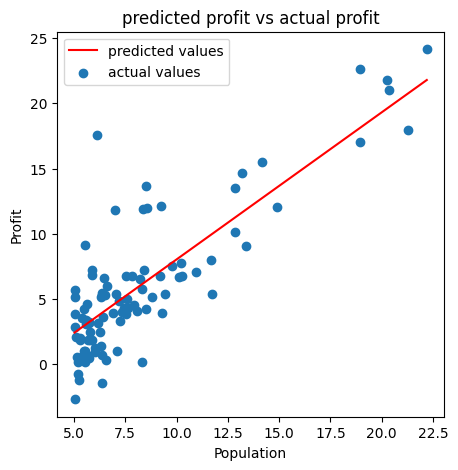

In [17]:
fig, axis=plt.subplots(figsize=(5,5))
axis.plot(x_axis,f,'r',label='predicted values')
axis.scatter(data.Population,data.Profit,label='actual values')
axis.legend(loc=2)
axis.set_xlabel('Population')
axis.set_ylabel('Profit')
axis.set_title('predicted profit vs actual profit')

## draw error graph

Text(0.5, 1.0, 'Error vs training times')

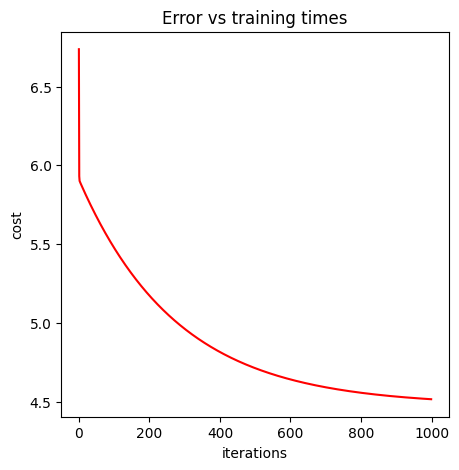

In [57]:
fig ,axs =plt.subplots(figsize=(5,5))
axs.plot(np.arange(iterations),cost,'r')
axs.set_xlabel('iterations')
axs.set_ylabel('cost')
axs.set_title('Error vs training times')